<a href="https://colab.research.google.com/github/DimaMirana/QueryClassifications/blob/master/genexQueryClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 

# Import CSV files

In [ ]:
# Settings of df
pd.set_option('display.max_colwidth', None)
col_Names=["sentence", "label"] #adding header

In [ ]:
df1 = pd.read_csv('englishTexts.csv', encoding = "UTF-8",sep=',',header=None,names=col_Names,engine='python')
df2 = pd.read_csv('banglaTexts.csv', encoding = "UTF-8",sep=',',header=None,names=col_Names,engine='python')

In [ ]:
df1.shape,df2.shape

((1950, 2), (3892, 2))

In [ ]:
df1.head(10),df2.head(10)

(                                                                      sentence  label
 0  credit card nite chaile koto income kora lagbe shei shomporke jante chacchi      2
 1                   what are the ways of rechaging my phone from  bank account      5
 2        ami 35 hajar taka proti mashe income korle ki amake credit card dibe?      2
 3                                                              how do I top up      5
 4                        amar credit card er pichone kto khoroch hobe bochore?      1
 5                             dear sir what is the credit card interest charge      4
 6                                 How much is the yearly bill for credit card?      1
 7                      credit card nite monthly income koto lage ei info lagbe      2
 8            proti mashe koto taka pele credit card nite parbo shei info lagbe      2
 9                                 amar credit card ase ekta, kto katbe year e?      1,
                                          

# Visualizing the Data

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


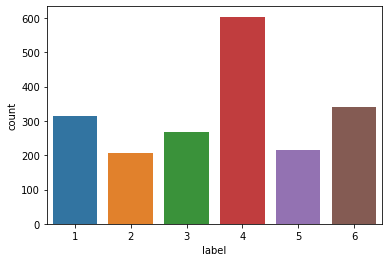

In [ ]:
sns.countplot(df1['label']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


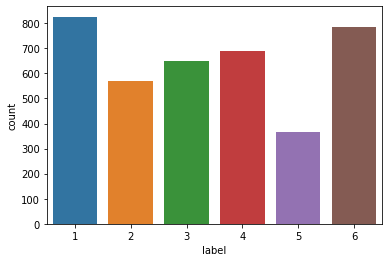

In [ ]:
sns.countplot(df2['label']);

# Importing Text Cleaning Library

In [ ]:
!pip install stopwordsiso

In [ ]:
!pip install bnltk

In [ ]:
# Cleaning the text libraries
import re 
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
from stopwordsiso import stopwords as stopwordsBangla
from bnltk.stemmer import BanglaStemmer  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Making Corpus

In [ ]:
def corpusArray(textType):
  corpus = []
  if(textType == 'en'):
    for i in range(0,1950):
      sen = re.sub('[^a-zA-Z]',' ' , df1['sentence'][i]) 
      sen = sen.lower() 
      sen = sen.split()
      ps = PorterStemmer()
      sen = [ps.stem(word) for word in sen if not word in set(stopwords.words('english'))]
      sen = ' '.join(sen) #list to string
      corpus.append(sen)
  else:
    for i in range(0,3892):
      sen = re.sub("[^\u0980-\u09FF']+",' ' , df2['sentence'][i]) 
      sen = sen.split()
      psBan =BanglaStemmer()
      sen = [psBan.stem(word) for word in sen if not word in set(stopwordsBangla('bn'))]
      sen = ' '.join(sen)
      corpus.append(sen)
  return corpus

In [ ]:
corpusBangla = corpusArray('bn')
corpusEnglish = corpusArray('en')

In [ ]:
corpusBangla[0:10],corpusEnglish[0:10]

(['স্য ক্রডিট কার্ড সুদ হ আপনা জানান প্লিজ',
  'ব্র্যাক ক্রেদিত কার্ড চাইল কাগজপত্র জমা দিব',
  'ব্র্যাক ক্রেডিট কার্ড বিল ব্যাপার',
  'ক্রেডিট কার্ড চা মাসিক সু হ',
  'হা মাসিক সুদ ক্রেডিট কার্ড',
  'আপনা ক্রেডিট কার্ড কাগজপত্র জমা ন',
  'প্লিজ',
  'ইনকাম চা কম ক্রেডিট কার্ড দিব',
  'ফ্যাসিলি পাবো ব্র্যাক ব্যাংক ক্রেডিট কার্ড নিল',
  'দাদা মাসিক ইন্টারেস্ট রেট ক আপনা জানান ক্রেডিট কার্ড'],
 ['credit card nite chail koto incom kora lagb shei shompork jant chacchi',
  'way rechag phone bank account',
  'ami hajar taka proti mash incom korl ki amak credit card dibe',
  'top',
  'amar credit card er pichon kto khoroch hobe bochor',
  'dear sir credit card interest charg',
  'much yearli bill credit card',
  'credit card nite monthli incom koto lage ei info lagb',
  'proti mash koto taka pele credit card nite parbo shei info lagb',
  'amar credit card ase ekta kto katb year e'])

# Make Bag of Words and export corresponding countingVectorizer

In [ ]:
def bag_of_words(textType):
  if(textType == 'en'):
    cv1 = CountVectorizer(max_features = 5100)
    X = cv1.fit_transform(corpusEnglish).toarray()
    y = df1.iloc[:,1].values
    cv = cv1
    pickle.dump(cv1, open("vectorEng.pickel", "wb"))
  else:
    cv2 = CountVectorizer(max_features = 5100)
    X = cv2.fit_transform(corpusBangla).toarray()
    y = df2.iloc[:,1].values
    cv = cv2
    pickle.dump(cv2, open("vectorBan.pickel", "wb"))
  return X,y,cv

In [ ]:
X_eng,y_eng,cvEng = bag_of_words('en')
X_ban,y_ban,cvBan = bag_of_words('bn')

In [ ]:
X_eng.shape,X_ban.shape

((1950, 618), (3892, 190))

# Train Test Split

In [ ]:
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_eng, y_eng, test_size = 0.20, random_state = 0)
X_train_ban, X_test_ban, y_train_ban, y_test_ban = train_test_split(X_ban, y_ban, test_size = 0.20, random_state = 0)

# ML Models list and checking functions

In [ ]:
models = [
          GaussianNB(),
          KNeighborsClassifier(n_neighbors = 3,metric ='minkowski', p=2),
          RandomForestClassifier(n_estimators = 10,criterion = 'entropy', random_state = 0),
          SVC(kernel = 'rbf',random_state=0),
          DecisionTreeClassifier(criterion = 'entropy',random_state = 0),
          XGBClassifier(),
          LogisticRegression(random_state=0)
]
CV = 8

In [ ]:
def checkingModels(X,y):
  cv_df = pd.DataFrame(index=range(CV * len(models)))
  entries = []
  for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
      entries.append((model_name, fold_idx, accuracy))
  cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
  return cv_df



# plotting various ml models accuracy on bloxplot

In [ ]:
def ploting_accuracy(cv_df):
  plt.figure(figsize=(20,5))
  sns.boxplot(x='model_name', y='accuracy', data=cv_df)
  sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
                size=8, jitter=True, edgecolor="gray", linewidth=2)
  plt.show()

# testing  ml models on validation data

In [ ]:
cv_df_eng = checkingModels(X_test_eng,y_test_eng)
cv_df_ban = checkingModels(X_test_ban,y_test_ban)

# plotting data for better visualization

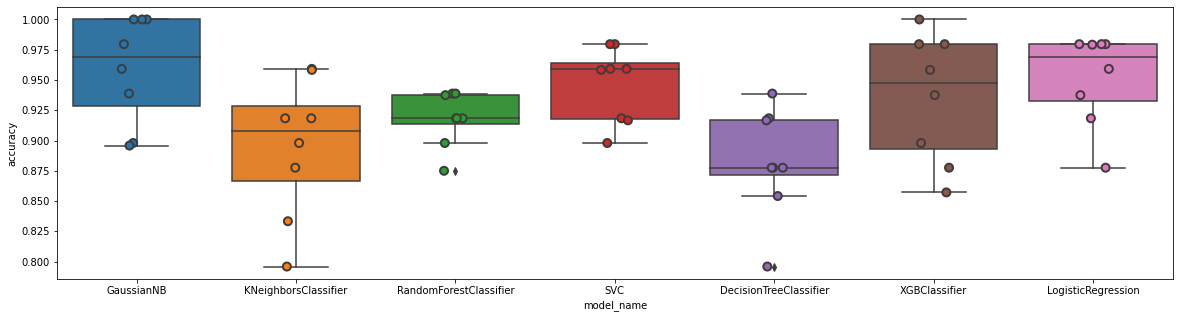

In [ ]:
ploting_accuracy(cv_df_eng)

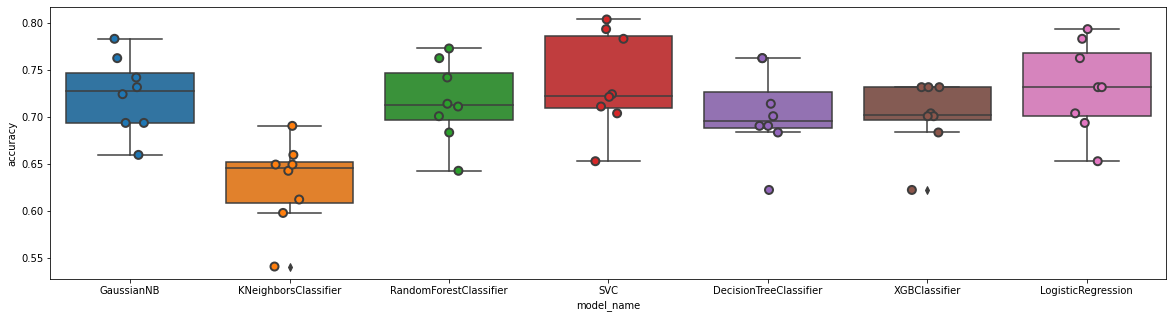

In [ ]:
ploting_accuracy(cv_df_ban)

# Summary of models

In [ ]:
cv_df_eng.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.882068
GaussianNB                0.958918
KNeighborsClassifier      0.894877
LogisticRegression        0.951318
RandomForestClassifier    0.917889
SVC                       0.946110
XGBClassifier             0.935959
Name: accuracy, dtype: float64

In [ ]:
cv_df_ban.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.703582
GaussianNB                0.724082
KNeighborsClassifier      0.630418
LogisticRegression        0.731893
RandomForestClassifier    0.716442
SVC                       0.737008
XGBClassifier             0.701018
Name: accuracy, dtype: float64

# take the best model from the summary and test if it's overfitting or not

In [ ]:
class modelStat:
    def __init__(self, name, train,test):  
        self.name = name  
        self.train = train
        self.test = test

In [ ]:
#models = GaussianNB, LogisticRegression, SVC
number = [0,3,6]
length = len(number)
model_names = []
def checking_overfitting(X_train,y_train,X_test,y_test):
  for i in range(length):
    classifier = models[int(number[i])].fit(X_train,y_train)
    y_predTrain = classifier.predict(X_train)
    y_predTest = classifier.predict(X_test)
    # print('models = ',str(models[int(number[i])]).split('(')[0])
    # print('trainingAccuracy = ',accuracy_score(y_train, y_predTrain))
    # print('testAccuracy = ',accuracy_score(y_test, y_predTest))
    model_names.append(modelStat(str(models[int(number[i])]).split('(')[0],accuracy_score(y_train, y_predTrain),accuracy_score(y_test, y_predTest)))
  return model_names

In [ ]:
summary_eng = checking_overfitting(X_train_eng,y_train_eng,X_test_eng,y_test_eng)

In [ ]:
summary_ban = checking_overfitting(X_train_ban,y_train_ban,X_test_ban,y_test_ban)
for obj in model_names: 
    print( obj.name, obj.train, obj.test, sep =',' ) 

GaussianNB,0.9935897435897436,0.9794871794871794
SVC,0.9955128205128205,0.9897435897435898
LogisticRegression,0.9974358974358974,0.9923076923076923
GaussianNB,0.7709604882749759,0.7406931964056482
SVC,0.7995502730485062,0.7650834403080873
LogisticRegression,0.7947317699967876,0.7560975609756098


# Make models for english and bangla texts

## Logistic Regression for EnglishText

In [ ]:
classifierEnglish = LogisticRegression(random_state=0)
classifierEnglish.fit(X_train_eng,y_train_eng)
y_predTrainEng = classifierEnglish.predict(X_train_eng)
y_predTestEng = classifierEnglish.predict(X_test_eng)
accuracy_score(y_train_eng, y_predTrainEng),accuracy_score(y_test_eng, y_predTestEng) #(0.9974358974358974, 0.9923076923076923) not overfitting

(0.9974358974358974, 0.9923076923076923)

## SVC for BanglaText

In [ ]:
classifierBangla = SVC(kernel = 'rbf',random_state=0)
classifierBangla.fit(X_train_ban,y_train_ban)
y_predTrainBan = classifierBangla.predict(X_train_ban)
y_predTestBan = classifierBangla.predict(X_test_ban)
accuracy_score(y_train_ban, y_predTrainBan),accuracy_score(y_test_ban, y_predTestBan) #(0.7995502730485062, 0.7650834403080873) not overfitting

(0.7995502730485062, 0.7650834403080873)

# Confusion Matrics for both  Classifier

### English

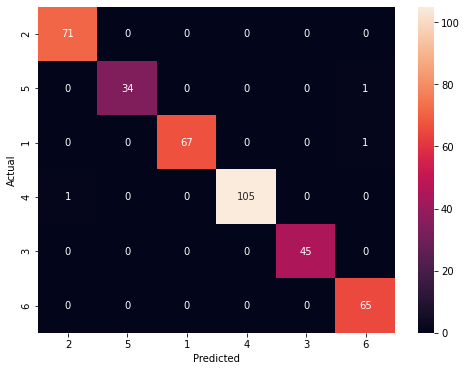

In [ ]:
conf_mat = confusion_matrix(y_test_eng, y_predTestEng)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df1['label'].unique(), yticklabels=df1['label'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# print(conf_mat)
# print(df1['label'].unique())

### Bangla

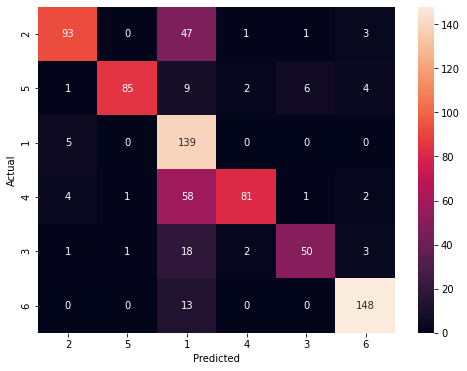

In [ ]:
conf_mat = confusion_matrix(y_test_ban, y_predTestBan)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df1['label'].unique(), yticklabels=df1['label'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Export  Models

In [ ]:
pickle.dump(classifierBangla, open('modelBangla.pkl','wb'))

In [ ]:
pickle.dump(classifierEnglish, open('modelEnglish.pkl','wb'))

# Test Accuracy Difference from Imported Models and Notebook models

In [ ]:
loaded_model = pickle.load(open('modelEnglish.pkl', 'rb'))
y_predTestEng = classifierEnglish.predict(X_test_eng)
resultEng = loaded_model.predict(X_test_eng)
accuracyModelEng = accuracy_score(y_test_eng, y_predTestEng)
accuracyImportedModelEng = accuracy_score(y_test_eng, y_predTestEng)

In [ ]:
accuracyModelEng,accuracyImportedModelEng

(0.9923076923076923, 0.9923076923076923)

In [ ]:
loaded_model = pickle.load(open('modelBangla.pkl', 'rb'))
y_predTestBan = classifierBangla.predict(X_test_ban)
resultBan = loaded_model.predict(X_test_ban)
accuracyModelBan = accuracy_score(y_test_ban, y_predTestBan)
accuracyImportedModelBan = accuracy_score(y_test_ban, y_predTestBan)

In [ ]:
accuracyModelBan,accuracyImportedModelBan

(0.7650834403080873, 0.7650834403080873)

# Testing CountVectorizer Similarity of Notebook and Exported One

In [ ]:
engText = ["credit"]
cvE = pickle.load(open("vectorEng.pickel", "rb"))
x_engNotebook = cvEng.transform(engText).toarray()
x_engExpo = cvE.transform(engText).toarray()

In [ ]:
x_engNotebook,x_engExpo

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0

In [ ]:
banText = ["ক্রডিট"]
cvB = pickle.load(open("vectorBan.pickel", "rb"))
x_banNotebook = cvBan.transform(banText).toarray()
x_banExpo = cvB.transform(banText).toarray()

In [ ]:
x_banNotebook,x_banExpo

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0